# Image Classifier

Let's train a simple image classifier to distinguish between sneakers and handguns.

Searching for 'sneaker photos'


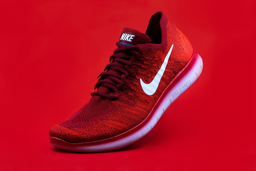

In [7]:
from fastai.vision.all import *
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

# let's load an image of a sneaker
urls = search_images('sneaker photos', max_images=1)
dest = 'data/sneaker.jpg'
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'handgun photos'


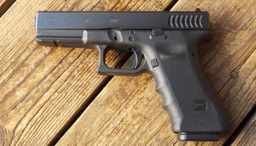

In [11]:
# let's grab an image of a handgun
download_url(search_images('handgun photos', max_images=1)[0], 'data/handgun.jpg', show_progress=False)
Image.open('data/handgun.jpg').to_thumb(256,256)

In [23]:
# Now let's perform a search for sample images
searches = 'handgun','sneaker'
path = Path('data/sneaker_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(20)
    download_images(dest, urls=search_images(f'{o} catalogue image'))
    sleep(20)
    download_images(dest, urls=search_images(f'{o} for sale'))
    sleep(20)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'handgun photo'
Searching for 'handgun catalogue image'
Searching for 'handgun for sale'


/home/marthinus/.local/share/virtualenvs/machinelearning-cPHCBFOy/lib64/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'sneaker photo'
Searching for 'sneaker catalogue image'
Searching for 'sneaker for sale'


In [24]:
# Check for and remove failed images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

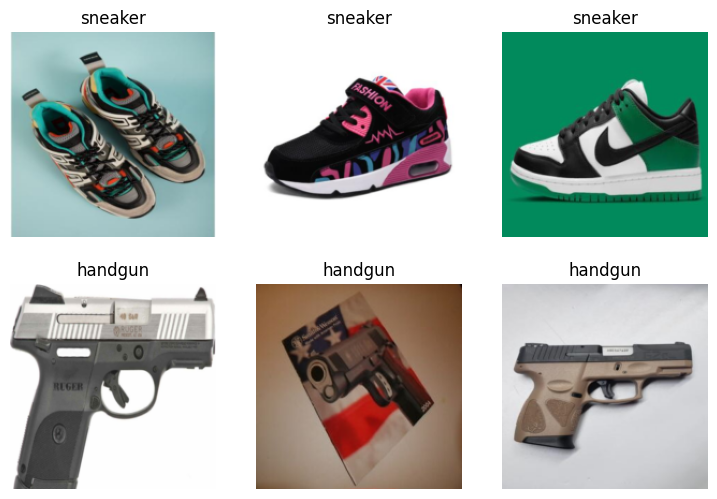

In [25]:
# Let's create our training and validation (testing) set with a DataBlock
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # features (images) and labels (catagories: sneakers or handguns)
    get_items=get_image_files, # returns all images in our path
    splitter=RandomSplitter(valid_pct=0.2, seed=69), # create a 20% random split
    get_y=parent_label, # assign our labels
    item_tfms=[Resize(192, method='squish')] # drop resolution for training
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [42]:
# Ok, let's gooo --- grab the resnet18 model checkpoint and let's tune it with out new data
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10) # I'm gonna train this model for 10 epochs

epoch,train_loss,valid_loss,error_rate,time
0,0.620427,0.092688,0.061224,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.150799,0.133391,0.061224,00:01
1,0.109872,0.071613,0.040816,00:01
2,0.076658,0.042131,0.020408,00:01
3,0.062818,0.042688,0.020408,00:01
4,0.050191,0.047548,0.020408,00:01
5,0.041904,0.047027,0.020408,00:01
6,0.035367,0.046554,0.020408,00:01
7,0.030342,0.046334,0.020408,00:01
8,0.028434,0.048308,0.020408,00:01
9,0.024071,0.047550,0.020408,00:01


Searching for 'glock'


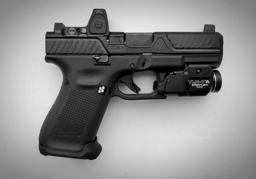

In [43]:
# let's load a new image of a sneaker
urls = search_images('glock', max_images=1)
dest = 'data/glock.jpg'
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

In [44]:
# So let's see how our new model performs!
is_handgun,_,probs = learn.predict(PILImage.create('glock.jpg'))
print(f"This is a: {is_handgun}.")
print(f"Probability it's a handgun: {probs[0]:.4f}")

This is a: handgun.
Probability it's a handgun: 1.0000


Searching for 'jordan sneakers'


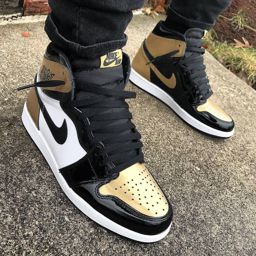

In [40]:
# let's load a new image of a sneaker
urls = search_images('jordan sneakers', max_images=1)
dest = 'data/jordans.jpg'
download_url(urls[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

In [48]:
# So let's see how our new model performs!
is_sneaker,_,probs = learn.predict(PILImage.create('jordans.jpg'))
print(f"This is a: {is_sneaker}.")
print(f"Probability it's a sneaker: {probs[1]:.4f}")

This is a: sneaker.
Probability it's a sneaker: 1.0000
